In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first1_row = session.query(Measurement).first()
first1_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2927b175fd0>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#1. Calculate the date one year from the last date in data set.
twelve_month_date =dt.date(2017,8,23)-dt.timedelta(days=365)
print(twelve_month_date)


2016-08-23


In [59]:
#2 Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>twelve_month_date).all()
precipitation



[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [14]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation)
df


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [15]:
# Sort the dataframe by date
df.sort_values(by='date')
df.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


<function matplotlib.pyplot.show(close=None, block=None)>

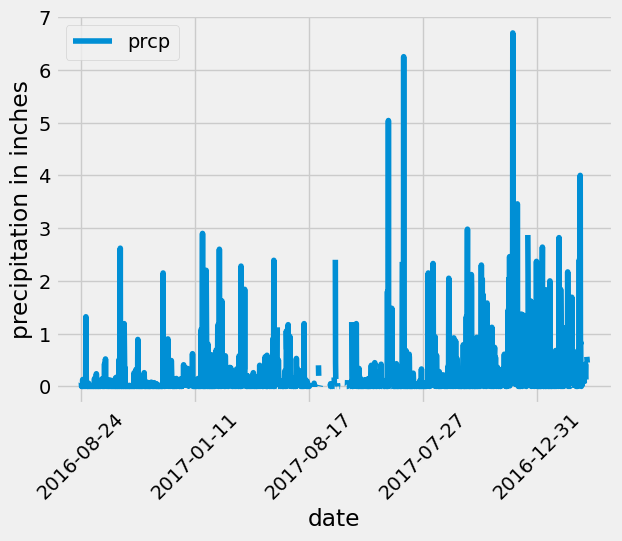

In [16]:

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45, x='date')
plt.xlabel('date')
plt.ylabel('precipitation in inches')
plt.show

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats =  df.describe()
print(summary_stats)


              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [18]:
# Explore station data
first2_row = session.query(Station).first()
first2_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2927cb29610>,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168}

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(Station.station).count()
total_station

9

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.station,func.count(Measurement.station)]
active_stations = session.query(*sel).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
stations = session.query(Station.station).all()
for station in stations:
    print(station[0])

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
print(most_active_station)
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
stats_station = session.query(*sel).filter(Measurement.station == most_active_station).all()
stats_station

USC00519281


[(54.0, 85.0, 71.66378066378067)]

In [64]:
# test query for api - climate app
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
str=[]
str=latest[0].split("-")
print(str[0],str[1],str[2])


latest_year = dt.date(int(str[0]),int(str[1]),int(str[2]))
previous_year = latest_year.year-1 
previous_year

previous_year_start_date  =dt.date(previous_year,1,1)
previous_year_end_date = dt.date(previous_year,12,31)
print(previous_year_start_date)
print(previous_year_end_date)
temp_observation = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
    filter(Measurement.station == most_active_station).\
        filter(Measurement.date>=previous_year_start_date).\
            filter(Measurement.date<=previous_year_end_date).all()
temp_observation

2017 08 23
2016-01-01
2016-12-31


[('2016-01-01', 74.0, 'USC00519281'),
 ('2016-01-02', 72.0, 'USC00519281'),
 ('2016-01-03', 68.0, 'USC00519281'),
 ('2016-01-04', 69.0, 'USC00519281'),
 ('2016-01-05', 70.0, 'USC00519281'),
 ('2016-01-06', 69.0, 'USC00519281'),
 ('2016-01-07', 76.0, 'USC00519281'),
 ('2016-01-08', 75.0, 'USC00519281'),
 ('2016-01-09', 74.0, 'USC00519281'),
 ('2016-01-10', 74.0, 'USC00519281'),
 ('2016-01-11', 73.0, 'USC00519281'),
 ('2016-01-12', 75.0, 'USC00519281'),
 ('2016-01-13', 74.0, 'USC00519281'),
 ('2016-01-14', 66.0, 'USC00519281'),
 ('2016-01-15', 71.0, 'USC00519281'),
 ('2016-01-16', 73.0, 'USC00519281'),
 ('2016-01-17', 75.0, 'USC00519281'),
 ('2016-01-18', 63.0, 'USC00519281'),
 ('2016-01-19', 61.0, 'USC00519281'),
 ('2016-01-20', 62.0, 'USC00519281'),
 ('2016-01-21', 65.0, 'USC00519281'),
 ('2016-01-22', 65.0, 'USC00519281'),
 ('2016-01-23', 75.0, 'USC00519281'),
 ('2016-01-24', 78.0, 'USC00519281'),
 ('2016-01-25', 69.0, 'USC00519281'),
 ('2016-01-26', 65.0, 'USC00519281'),
 ('2016-01-2

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
print(twelve_month_date)
temperature = session.query(Measurement.tobs).filter(Measurement.station == most_active_station)\
    .filter(Measurement.date > twelve_month_date).all()
temperature


2016-08-23


[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


In [24]:
# create a dataframe
temperature_df = pd.DataFrame(temperature, columns=['tobs'])
temperature_df


,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


Text(0, 0.5, 'frequency')

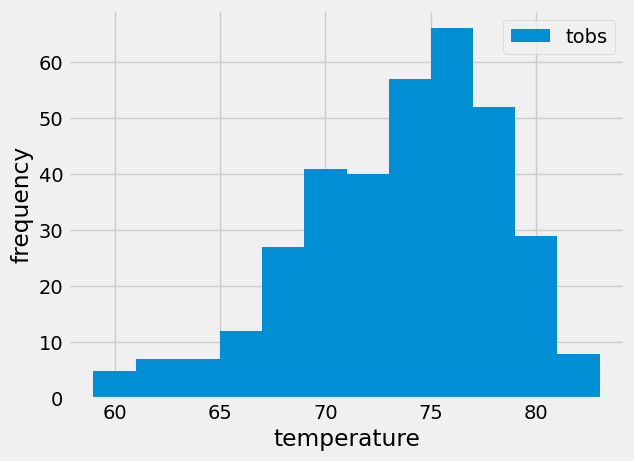

In [25]:
# plot the results as a histogram
temperature_df.plot( kind = 'hist', bins=12)
plt.xlabel('temperature')
plt.ylabel('frequency')

# Close Session

In [26]:
# Close Session
session.close()